## Machine Learning for the 20th century: <br> Can a United Kingdom database from 1987 classify a glass cosmetics jar from the 1930s that might have belonged to Amelia Earhart?
Author: Joe Cerniglia <br>
Reviewers: <br>
Date: March 18, 2022 <br><br>

## Background
In the summer of 2010, researchers from The International Group for Historic Aircraft Recovery excavated, in fragments, a small semi-opaque cosmetic jar from the Pacific island of Nikumaroro. They were searching for evidence to support their hypothesis that Amelia Earhart and her navigator Fred Noonan perished there in 1937 after very nearly succeeding in their pathbreaking mission to circumnavigate the globe by air at its widest point, the equator.

My interest in glass artifacts from the island ultimately led to a personal quest to become a resident glass expert of the team. In partnership with archaeologists Thomas King and Bill Lockhart, and chemist Greg George, we produced a [paper](https://www.academia.edu/40823470/A_Freckle_In_Time_or_a_Fly_in_the_Ointment) that summarized our findings. By then, our work on the jar had already generated some [press](https://www.nbcnews.com/id/wbna47623025).

While researching the jar in 2013, I requested EAG Labs of Sunnyvale, California to determine the chemical composition of the artifact jar, and that of a 'sibling' glass jar that I had purchased on eBay and had named the clear facsimile. The clear facsimile jar was similar to the artifact in most respects, but importantly, it was transparent while the artifact was semi-opaque. As their [report](https://tighar.org/Projects/Earhart/Archives/Research/ResearchPapers/freckleintime/Document_02_Facsimileclearjarreport.pdf) shows, the two jars turned out to have very different chemical compositions. Interestingly, both jars were manufactured by the same company, Hazel-Atlas of Wheeling, West Virginia.


## Data 
Data in the social sciences means, informally, a collection of facts. In the world of business, we work not so much with a collection of facts as a collection of data vectors, and the tools to analyze this data are not so much the tools of the laboratory as they are the tools of the computer: statistics, mathematics, programming languages, and, in recent years increasingly, machine learning.

While taking an online course from eCornell in machine learning, one of my assignments was to select a database of my choice with which to build a machine learning project. Thus was my interest in analyzing the artifact jar and its sibling rekindled. Instead of using data as a collection of facts, I now wanted to use the jars' laboratory data to study machine learning classification. 

One of the fundamental machine learning problems is the classification problem. Classification problems use data vectors (think of them as coordinate plots on a multi-dimensional plane), often called 'features' of the data. Each example in the data has its own unique set of features that describe a class of the data. The jars, or more properly the glass of which the jars are made, each have three measurements for the features calcium, magnesium, and barium. For these particular instances of glass, these features may be thought to describe containers.

Two sets of measurements for the purposes of machine learning are not of much value, however, because machine learning models require a full range of known examples upon which to 'train' a model to recognize examples it has never seen before.

EAG Labs had been thorough, and for the purposes of our 2013 analysis, their data was ample enough. For the purposes of machine learning, however, the data, while eagerly anticipated by our team, was paltry. Where would I find the data upon which to train a machine learning model? I did not need to search very far for my answer. British forensic scientists ``Ian W. Evett`` and ``Ernest J. Spiehler`` assembled a database of glass samples in 1987 for the purposes of solving crimes, such as break-ins. Their paper was first presented at the 1987 conference of the KBS (Knowledge-Based Systems) in Goverment and is titled: <br>"Rule Induction in Forensic Science." http://gpbib.cs.ucl.ac.uk/gp-html/evett_1987_rifs.html. The database is available at the University of California Machine Learning Repository [here](http://archive.ics.uci.edu/ml/datasets/Glass+Identification).

The weight percent of eight elemental components and refractive index comprise the features of their database and each sample is represented by a target variable called Type. The types of glass represented in the sample are: Window Float, Window Non-Float, Vehicle Float, Container, Tableware, and Headlamp. There are no Vehicle Non-Float types represented in the data.

My two glass samples, as luck would have it, were independently measured for most of the same elements as found in the U.K. dabase, with a few caveats:

Because silicon was measured in my lab data as 'Matrix,' with no actual number stated, I estimated the silicon for both containers based on the average for containers in the database (72.37). Because K (potassium) was measured at 980 ppm for the clear facsimile, rather than by wt%, I assigned it a value of 50% of the wt% for the artifact jar: .5 X .24 = .12. Because Fe (iron) is at very low wt% levels in the 1987 database, and the levels in my data are listed at very low parts per million (ppm), I assigned to the artifact jar and to the clear facsimile a wt% of Fe of .02 and .01, respectively.

Refractive index was not measured for either the artifact jar or the clear facsimile. Since the clear facsimile is completely transparent, I assigned it the minimum refractive index of containers from the 1987 dataset. Since the artifact jar is semi-opaque, I assigned it the maximum refractive index of containers from the 1987 dataset. These educated guesses were necessary for the machine learning experiment that concludes this notebook.*

#### *Note: In a later section of this story, we will employ a technique to evaluate whether or not the decision to supply  a few of the values for the jars makes a significant difference in our machine learning algorithm's ability to predict the class of the two jar samples.


## Research Agenda
There are three main research questions I wish to answer in my machine learning classification problem:<br>
1) What can Python's Matplotlib graphing capabilities reveal about the similarities and/or dissimilarities between the artifact, clear facsimile, and the glass samples in the 1987 database?<br>2) What do the correlations between elements for the different types of glass in the 1987 database reveal about late 20th century glassmaking, as compared with early 20th century glassmaking?<br>3) Using machine learning to train a model on the 1987 database, could that model be used to classify the type (container) of one or both of the older samples unseen by the model?



### First, before we start to analyze these questions, we will read in the data file and create a simple report.

Our first task is to read in the 1987 glass.data file that resides in the same directory as this notebook. Then, we can assign the names of the variables in this file to a variable called names. Notice I am carefully avoiding the variable name 'Type' because it is a reserved word in Python. Using that reserved word will co-opt the type function, thus disabling my ability to check the types of specific variables. Instead, I will use the variable name 'GlassType' to contain the various types of glass.

In [3]:
filename='glass.data'
names=['ID','Ref_ix','Na','Mg','Al','Si','K','Ca','Ba','Fe','GlassType']

The three questions of the research agenda (listed above) are quite different. It will be convenient to modify the dataset in different ways for each problem. Therefore, we will read in the filename twice to create two Pandas dataframes of the glass data, thus allowing us to have separate data pipelines to keep the machine learning question separate from the other two. The pandas library in Python provides a convenient function, read_csv, for this purpose.

In [4]:
from pandas import read_csv
dataset = read_csv(filename, header=None, sep=',',names=names, na_values='.')
dataset_ml = read_csv(
    filename, header=None, sep=',',names=names, na_values='.')

Next, we will use the info method to provide the list of variables in the file with descriptions of their non-null counts and data types. It would be useful as well to have a simple statistical report of this dataset, which is provided by the describe method.

In [5]:
display(dataset_ml.info())
display(dataset_ml.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         214 non-null    int64  
 1   Ref_ix     214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  GlassType  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


None

,ID,Ref_ix,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


There are no nulls in the dataset. The column types are all numeric. All 214 samples of the database have been included.

### Create a dictionary of glass types.
We need a way to translate the numerical glass types found in the 1987 database to their English equivalents. This is accomplished by creating a Python dictionary.

Note we could have omitted Vehicle NF from this dictionary, since there are no examples in the data of this type; however, for the sake of clarity we should most likely retain it.

Note also that if we should decide to modify the machine learning portion of this program to predict types with regression models, an entry for '0': 'WindowF' would need to be added, since the rounding of continuous integer types, which regression models produce, could sometimes produce a zero value. See the machine learning section that follows for more detail.

In [6]:
 dict = {1: 'WindowF',
  2: 'WindowNF',
  3: 'VehicleF',
  4: 'VehicleNF',
  5: 'Container',
  6: 'Tableware',
  7: 'Headlamp'}

### Create some utility functions for plotting graphs from the 1987 dataset.

Before using machine learning on the data, there is much we can learn about the two jars' likeness to glass samples in the 1987 database, simply by observing counts based on specific criteria. By comparing each jar with its "nearest neighbors," based on measurements for three elements in the periodic table, we may gain a sense of which type of glass in the database each jar most closely resembles. 

We will therefore write functions to create three graphical reports, one for each of the three elements magnesium, calcium, and barium. Each of the three reports will display three things:<br>
1) The complete range of counts for each glass type. (This graph will be repeated for each report.) <br>
2) The range of counts for all glass types within 0.15 above and below the elemental measurement of the <b>clear facsimile</b>. <br>
3) The range of counts for all glass types within 0.15 above and below the elemental measurement of the <b>artifact</b>.

The key function, numgroups, requires an element from the periodic table so that it can look up parameters in the included dictionary. This dictionary contains the measurements obtained from the lab for each element for the clear facsimile and for the artifact. Low and High parameter values for each element are also required, even when the complete range of counts is to be displayed. These will be passed to the function as hard-coded values that are either <br>
> a. exactly 0.15 above and below the measurement for each jar; or <br>
> b. the lowest and highest measured values in the database for each element.

Last, the jar_spec parameter is simply the type of jar to be analyzed, clear facsimile or artifact. The jar_spec is used to create the title for each graph.

If the graph's input parameters result in a graph with a single type of glass, no graph is created. (Bar graphs with but a single bar are, after all, neither very attractive nor useful!) Instead, a message is displayed that mirrors the text that accompanies the other graphs.

If the number of glass types returned by the criteria is equal to zero, we cause an error to be thrown with int('d'), which attempts to convert the letter 'd' to an integer, rather than waiting for the error that would have been thrown naturally by the plot statement. If we had waited for the plot statement to throw the error, useless information about the size of the graph (which cannot be drawn in this case) is displayed. In the case of this error, a simple message is printed to inform us that no relevant glass samples were found in the database.

The other function, ticks_restrict_to_integer, is a utility function that controls the number of tick marks on the y-axis of each graph. The y-axis represents the count. Because the scale of counts varies with each graph, it was necessary to make the y-axes more uniform with one another by having this function.

In [7]:
def ticks_restrict_to_integer(axis):
    """Restrict the ticks on the given axis to be at least integer;
    that is, no half ticks at 1.5 for example.
    """
    from matplotlib.ticker import MultipleLocator
    major_tick_locs = axis.get_majorticklocs()
    if len(major_tick_locs) < 2 or major_tick_locs[1] - major_tick_locs[0] < 1:
        axis.set_major_locator(MultipleLocator(1))    

def numgroups(element,low,high,jar_spec):
    """
    non-fruitful function. Outputs a graph if the number of types of
    glass within the DataFrame is > 1.  Otherwise, the function prints
    a message, for aesthetic reasons.

    parameters:
    element: an element in the periodic table
    low: A minimum value for the measured element, which acts as the 
    minimum value to allow into the dataset sample
    high: A maximum value for the measured element, which acts as the 
    maximum value to allow into the dataset sample
    jar_spec: A value of either 'clear facsimile' or 'artifact', used
    in the title of the graph

    Preconditions:
    element is a string with value of: 'Mg' or 'Ca' or 'Ba'
    
    Low cannnot be greater than high.
    """
    jar_spec='full range of ' + element + ' measurements in the database' if jar_spec==None else jar_spec
    if 'clear' in jar_spec or 'artifact' in jar_spec:
        #Tolerance provides information in the report about the range of values considered in the graph.
        tolerance=round((high-low)/2,2)
    else:
        tolerance=0
    if low>high:
        print('Low value must be smaller than the high value. Try again.')
        return
    rangedict = {'Ba':['Barium',[.37,.74]],
                 'Mg':['Magnesium',[2.4,4.3]],
                 'Ca':['Calcium',[3.6,8.5]]}
    facsimile_ref=rangedict[element][1][0]
    artifact_ref=rangedict[element][1][1]
    element_full_name=rangedict[element][0]
    sampl = dataset[(dataset[element] >= low) & (
        dataset[element] <= high)]
    number_groups=sampl['GlassType'].value_counts().shape[0]
    if number_groups==1:
        print("Count of Glass Types in the 1987 database \nwith" +
                    " a range of of measured values of " + 
                    element_full_name + " \nbetween " + str(low) +
                    " and " + str(high) + " wt%. \nThis is the range of" + 
                    " counts for the " + jar_spec.upper() + " \nthat fall within a tolerance of " +
                    "+-" + str(tolerance) + ' of its measurement.')
        print('There is only ONE sample Type.')
        print(sampl['GlassType'].values[0],'=',sampl.shape[0])
        print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n  1930s Artifact jar =',artifact_ref,'wt%')
    else:
        print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n  1930s Artifact jar =',artifact_ref,'wt%')
        try:
            vc=sampl['GlassType'].value_counts()
            int('d') if len(vc)==0 else int('1')
            vc.plot(
                kind='bar', figsize=(10, 6), rot=0, cmap='Spectral');
            plt.xlabel("Glass Type", labelpad=14,fontsize=16,rotation=0)
            plt.ylabel("Count of Type", labelpad=70, 
                       fontsize=16,rotation=0)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            ax = plt.subplot()
            ticks_restrict_to_integer(ax.yaxis)
            if tolerance>0:
                plt.title(
                    "Count of Glass Types in the 1987 database \n with" +
                    " a range of measured values of " + 
                    element_full_name + " \n between " + str(low) +
                    " and " + str(high) + " wt%. \n This is the range of" + 
                    " counts for the " + jar_spec.upper() + " \n that fall within a tolerance of " +
                    "+-" + str(tolerance) + ' of its measurement.', y=1.02,fontsize=16)
            else:
                plt.title(
                    "Count of Glass Types in the 1987 database \n with" +
                    " a range of measured values of " + 
                    element_full_name + " \n between " + str(low) +
                    " and " + str(high) + " wt%. \n This is the range of" + 
                    " counts for the " + jar_spec.upper() + ".", y=1.02,fontsize=16)
            plt.show()
        except Exception as e: 
            #print(e)
            print('No glass samples are in the range of ' + str(low) +
                " and " + str(high) + ' wt% for ' + element_full_name + '.')
            print()
            

### What types of glass in the 1987 database are most similar to the 1930s samples in terms of magnesium, barium or calcium content?
To review what was stated above, examining Mg, Ba, and Ca individually in the U.K. database, we can perform the following steps to produce a report: 
1. Obtain the complete distribution of counts in the 1987 database by restricting the element's values to the range between its minimum and maximum wt% values. 
2. See the distribution of counts in the 1987 database that results from setting the range of measured wt% for the element to a tolerance 0.15 wt% above and below its measurement for the ```clear facsimile```. 
3. See the distribution of counts in the 1987 database that results from setting the range of measured wt% for the element to a tolerance 0.15 wt% above and below its measurement for the ```artifact```.
4. Repeat steps 1 to 3 for the next element until all elements have been reported.

## Report for Magnesium

reference: Clear facsimile jar = 2.4 wt%
  1930s Artifact jar = 4.3 wt%


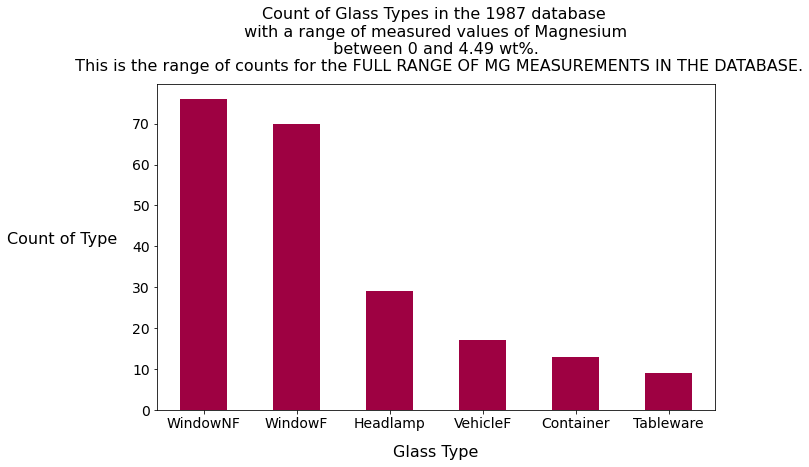

reference: Clear facsimile jar = 2.4 wt%
  1930s Artifact jar = 4.3 wt%


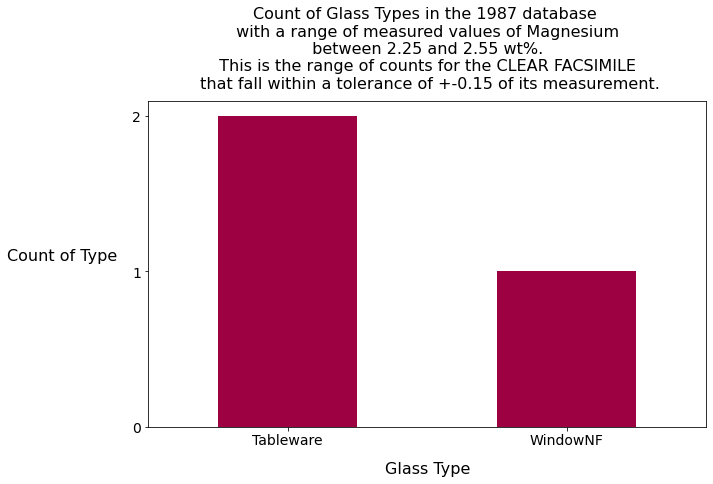

reference: Clear facsimile jar = 2.4 wt%
  1930s Artifact jar = 4.3 wt%
No glass samples are in the range of 4.15 and 4.45 wt% for Magnesium.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')

dataset.replace({"GlassType": dict},inplace=True)
element='Mg'
Mgdict={'clear facsimile':[2.25, 2.55],'artifact':[4.15,4.45]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and the artifact
for jar_type in Mgdict:
    low=Mgdict[jar_type][0]
    high=Mgdict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Magnesium Analysis
Magnesium:<br>
The clear facsimile jar has 2.4 wt% Mg. There are only two glass types, tableware and non-float windows, with values between 2.25 and 2.55 wt% Mg. Magnesium, if it were the only feature, would seem to predict the clear facsimile jar to be in the window or the tableware family, a close cousin to the container family. <br>The artifact jar has 4.3 wt% Mg. Checking back to the report we created with the describe() method, this value is well above the 75th percentile. We know from the literature on glassmaking that any Mg measurement from a modern glass sample that is above 3.5 wt% is likely to be a window, and not a container.[1]

## Report for Calcium

reference: Clear facsimile jar = 3.6 wt%
  1930s Artifact jar = 8.5 wt%


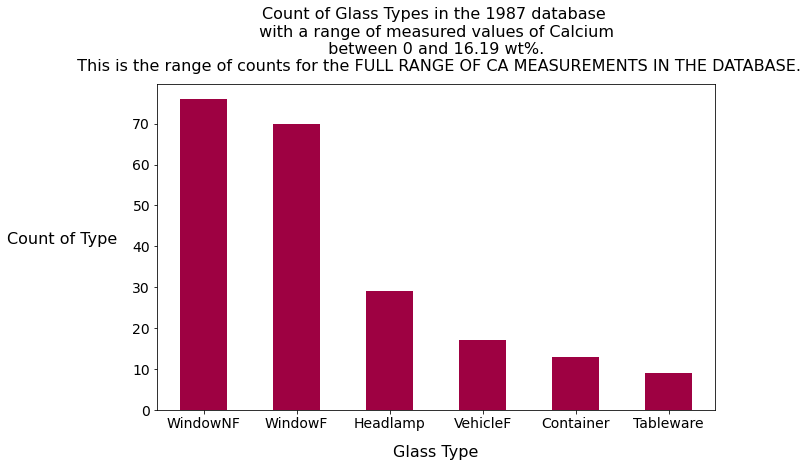

reference: Clear facsimile jar = 3.6 wt%
  1930s Artifact jar = 8.5 wt%
No glass samples are in the range of 3.45 and 3.75 wt% for Calcium.

reference: Clear facsimile jar = 3.6 wt%
  1930s Artifact jar = 8.5 wt%


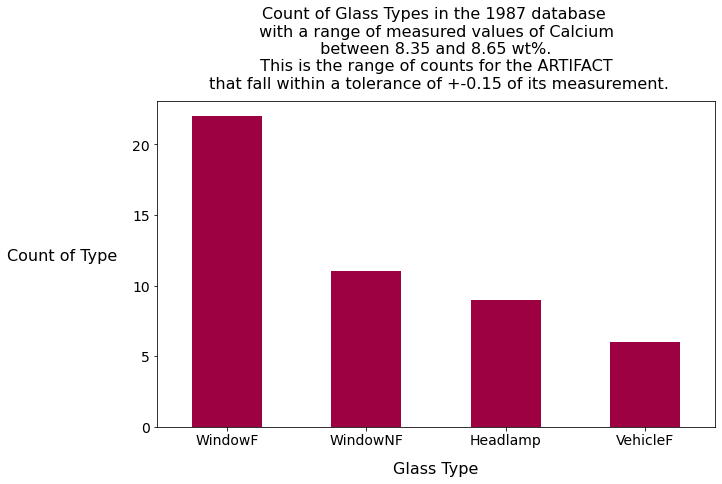

In [9]:
dataset.replace({"GlassType": dict},inplace=True)
element='Ca'
Cadict={'clear facsimile':[3.45, 3.75],'artifact':[8.35,8.65]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and the artifact
for jar_type in Cadict:
    low=Cadict[jar_type][0]
    high=Cadict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Calcium Analysis

Calcium:<br>
The clear facsimile jar has 3.6 wt% Ca. We can see from the report we created with the describe() method that this is off-scale low, a value less than all the samples in the database. No glass samples are in the range of 3.45% and 3.75% weight calcium. <br>The artifact jar has 8.5 wt% Ca. This is close to the mean in the database (8.96) for all glass types, but no containers are displayed on the graph within +- .15 of the calcium value measured on the artifact.

## Report for Barium

reference: Clear facsimile jar = 0.37 wt%
  1930s Artifact jar = 0.74 wt%


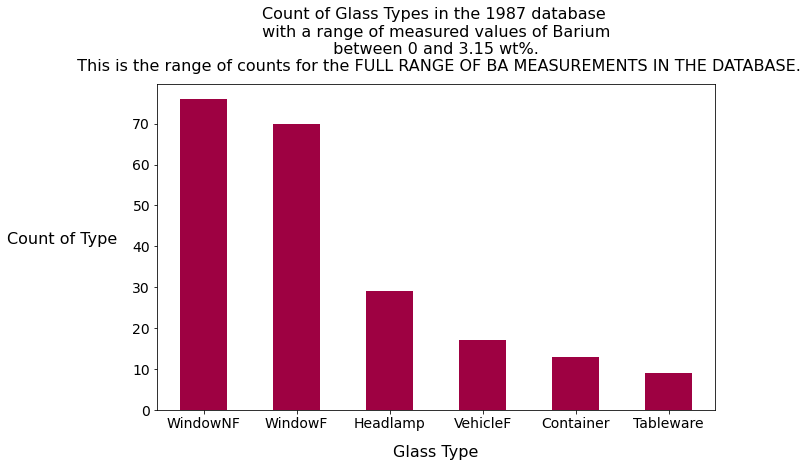

reference: Clear facsimile jar = 0.37 wt%
  1930s Artifact jar = 0.74 wt%


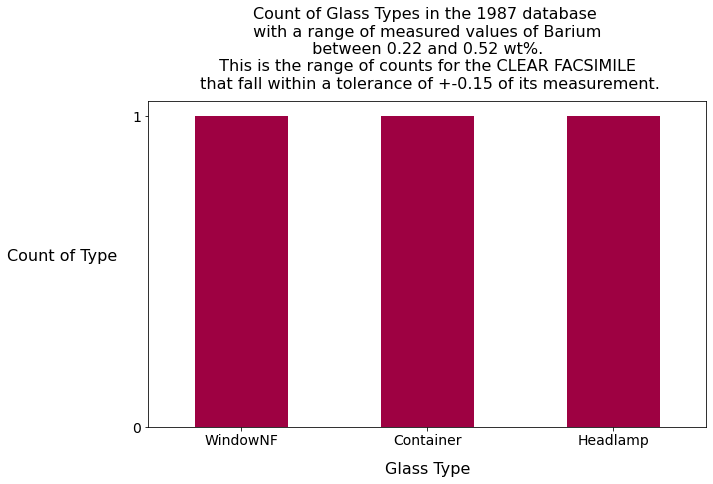

reference: Clear facsimile jar = 0.37 wt%
  1930s Artifact jar = 0.74 wt%


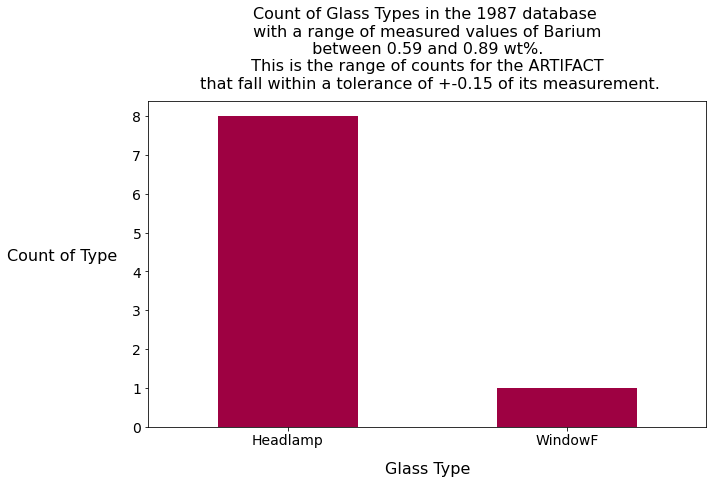

In [10]:
dataset.replace({"GlassType": dict},inplace=True)
element='Ba'
Badict={'clear facsimile':[0.22, 0.52],'artifact':[0.59,0.89]}
low=0
high=dataset[element].max()

#Run report for all glass types
numgroups(element,low,high,None)

#Run reports for the clear facsimile and the artifact
for jar_type in Badict:
    low=Badict[jar_type][0]
    high=Badict[jar_type][1]
    numgroups(element,low,high,jar_type)

### Barium Analysis

Barium:<br>
The ratio of 2:1 for the element Barium in the two glass samples (.74 for the artifact and .37 for the clear facsimile jar) suggests that the glass maker, Hazel-Atlas, used a recipe. This is not uncommon in the glass industry. 
For the clear facsimile, one window, one container and one headlamp have measurements of barium in the database that are within +- 0.15 of its measured value of barium.
For the artifact, eight headlamps and one window have measurements of barium in the database that are within +=0.15 of its measured value of barium.

Conclusion: We have not yet applied any machine learning to the identification of the unseen jars, but it would appear from the weight percent of some of the key ingredients from these jars that windows, of the float or non-float variety, and, to a lesser extent, headlamps, are strong candidates for how the 1987 database might predict their identity, if machine learning were employed as a predictive tool to do this.

### Turning the question around: If one were to subset the 1987 database only for containers, how would that database compare with the two jars?  Both of the jars are, of course, containers.

In [11]:
sampcont = dataset[dataset['GlassType'].isin(['Container'])]
sampcont=sampcont.drop(['ID', 'GlassType'], axis=1)
print('Container summary report:')
display(sampcont.describe())
rangedict = {'Ba':['Barium',[.37,.74]],
                 'Mg':['Magnesium',[2.4,4.3]],
                 'Ca':['Calcium',[3.6,8.5]]}
ELEMENTS=['Mg','Ca','Ba']
for element in ELEMENTS:
    print()
    print(
        element,': min to max:',sampcont[element].min(),'to'
        ,sampcont[element].max())

    facsimile_ref=rangedict[element][1][0]
    artifact_ref=rangedict[element][1][1]
    print('reference: Clear facsimile jar =',facsimile_ref,'wt%'
              '\n  1930s Artifact jar=',artifact_ref,'wt%')

Container summary report:


,Ref_ix,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
std,0.003345,0.777037,0.999146,0.693920,1.282319,2.138695,2.183791,0.608251,0.155588
min,1.513160,11.030000,0.000000,1.400000,69.890000,0.130000,5.870000,0.000000,0.000000
25%,1.516660,12.730000,0.000000,1.560000,72.180000,0.380000,9.700000,0.000000,0.000000
50%,1.519940,12.970000,0.000000,1.760000,72.690000,0.580000,11.270000,0.000000,0.000000
75%,1.521190,13.270000,1.710000,2.170000,73.390000,0.970000,11.530000,0.000000,0.000000
max,1.523690,14.010000,2.680000,3.500000,73.880000,6.210000,12.500000,2.200000,0.510000



Mg : min to max: 0.0 to 2.68
reference: Clear facsimile jar = 2.4 wt%
  1930s Artifact jar= 4.3 wt%

Ca : min to max: 5.87 to 12.5
reference: Clear facsimile jar = 3.6 wt%
  1930s Artifact jar= 8.5 wt%

Ba : min to max: 0.0 to 2.2
reference: Clear facsimile jar = 0.37 wt%
  1930s Artifact jar= 0.74 wt%


When we restrict the U.K. database to only containers, the comparisons with the artifact and the clear facsimile enter into sharper relief. The clear facsimile has a high magnesium content for a container but this is still within range of the lowest and highest values within the U.K. database. The artifact from Nikumaroro has a magnesium content much higher than that of the highest nearest neighbor in the U.K. database.

The clear facsimile has a calcium measurement lower than that of all the containers in the U.K. database. This indicates, perhaps, that calcium was not as heavily used in glassmaking in the early part of the twentieth century. The artifact of 1930s origin has a calcium content, 8.5, that is lower than the 25th percentile. This is a low value for a container, especially when one considers that the mean for containers in the U.K. database, 10.12, is skewed toward the higher end of the range.

The clear facsimile and the artifact are within the range of minimum to maximum in barium weight percentage for containers; however, most of the measured values of barium in the database are zero. The measured values of barium for facsimile and artifact are still far higher than those usually found in the U.K. database.

### What do the correlations between elements for the different types of glass in the 1987 database reveal about late 20th century glassmaking, as compared with early 20th century glassmaking?
To answer this question, we can generate custom diverging colormaps from the U.K. database (excluding our samples of clear facsimile and artifact). The correlation colormaps, also known as heatmaps, show, for example, which elements of the glass most strongly correlate with refractive index, which may be considered synonymous with brilliance. 

To keep the number of graphs to a manageable amount, we will restrict them to the glass types of Window Float, Window Non-Float and Containers. These three heatmaps provide a good summary of the correlations of ingredients in glassmaking of the late twentieth century.

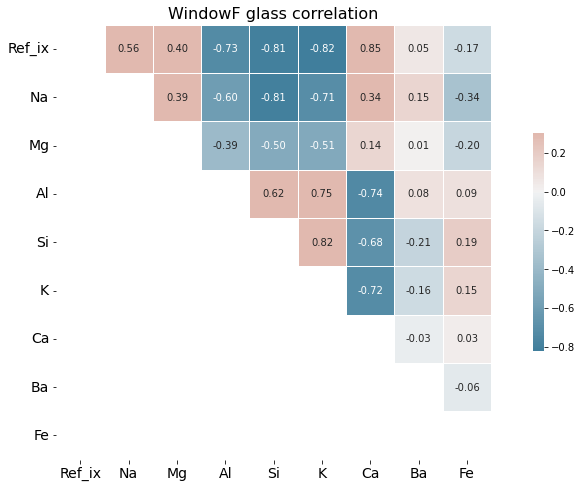

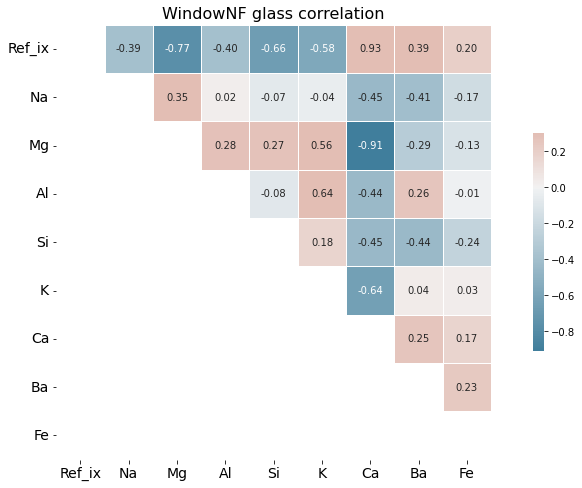

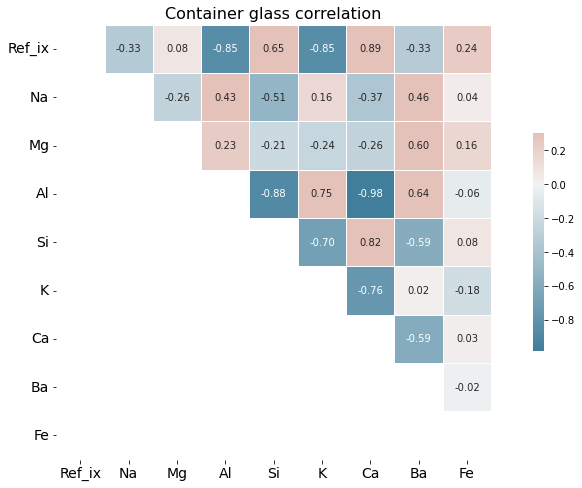

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

TYPES = ['WindowF', 'WindowNF', 'Container']

def get_dataset(src, glass_type):
    #subset the df into a new df
    df = src[src.GlassType == glass_type]
    df.drop(['ID'], axis=1,inplace=True)
    return df

def make_heatmap(source, title):
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    corr=source.corr()
    # Generate a mask for the lower triangle
    mask = np.tril(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
    vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=14,rotation=0)
    plt.yticks(fontsize=14,rotation=0)
    plt.gcf().set_size_inches(15, 8)
    return plt, title

def update_heatmap(glass_type):
    src = get_dataset(dataset, glass_type)
    title = make_heatmap(src, glass_type + ' glass correlation')
    plt.title.text = title
    plt.show()

for kind_of_glass in TYPES:
    update_heatmap(kind_of_glass)

# Instead of using a for-loop, it is also possible to have an interactive exhibit, using this Python syntax:
#interact(update_heatmap, glass_type=TYPES);

### Analysis of Correlation Heat Maps
One might expect barium, an ingredient used to increase brilliance, thus increasing refractive index, would be positively correlated with refractive index in these graphs. Barium, however, is frequently measured at 0.0 weight percent in the 1987 dataset or present in only trace amounts. It may be that late 20th century glassmaking does not incorporate barium to the same degree that it was incorporated into glass production of the 1930s. For an example of the importance of barium in the early 20th century, see a 1936 Hazel Atlas glass patent [here](https://tighar.org/Projects/Earhart/Archives/Research/ResearchPapers/freckleintime/Document_05_FrancisFlint1936patent.pdf). 

Container glass negatively correlates barium with refractive index. Window non-float glass, however, shows a moderate correlation. This makes sense, since this type of glass is often found in churches or for specialized uses in which an aesthetic ambience is desired. See https://en.wikipedia.org/wiki/Crown_glass_(window)#/media/File:AKMuseum5.JPG as an example.

Calcium, probably in the form of calcium oxide, is highly correlated in the 1987 database with refractive index. This is due to the fact that calcium oxide increases refractive index. See https://www.academia.edu/12254939/Optical_and_mechanical_properties_of_calcium_phosphate_glasses for a study of this effect. There is good evidence that calcium was the element of choice to increase brilliance in 1980s glass production, rather than barium. The toxic effects of barium, which is a heavy metal, were becoming much better understood by the time the U.K. researchers assembled their database. The World Health Organization published a [memorandum](https://inchem.org/documents/hsg/hsg/hsg046.htm#SectionNumber:4.1) in 1991 in which it specifically warned of the dangers of barium in glass production. One prominent U.S. [patent](https://patentimages.storage.googleapis.com/7e/18/e1/18b38abaca0806/US8877663.pdf) from 2013 specifically mentions CaO (calcium oxide) as an ideal substitute for metals such as barium and lead.

By contrast, in the 1930s barium was a favorite ingredient of specialty glassmakers. As Francis Flint described in his patent (cited above), the use of barium sulfate increased brilliance, but the sulfates needed then to be reduced to prevent small seeds forming in the glass mixture, thus reducing the quality of the glass. Flint recommended zinc, magnesium, aluminum or tin as reducing agents. Sodium and calcium have been recommended in more modern literature of the art [2]. In window non-float glass, aluminum is positively correlated with barium.

It would seem good practice to analyze the correlations of each of these glass types separately, as we have done, since obviously the desired qualities of the glass will differ depending on the uses to which the glass will be put, and thus recipes will differ accordingly. The desired refractive index and brilliance of vehicle float glass will be far different than that of container or tableware glass, for example.

The elemental correlations in this 1987 database suggest changing priorities between production techniques of the 1930s and production techniques of the 1980s, toward more utilitarian styles and techniques. One does not require statistics to observe that container glass resembling church windows has all but disappeared, if it ever was very common, giving way to containers in which seeing the contents clearly through the glass is the overriding concern. This change will probably affect what specific types of glass that machine learning models can correctly predict for our unseen samples from the 1930s.

Now we turn to our last question.

### Using machine learning to train a model on the 1987 database, can that model be used to identify the type (container) of one or both of the jars unseen by the model?

This should be a straightforward machine learning classification problem. The first step is to gather up relevant modules from various sci-kit learn and imbalanced learning libraries, using multiple import statements.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

### Setting the stage for an attractive output
Next, we will address the fact that the output we want to see needs to be prepared for attractive presentation. After we have generated predictions for the identity of the jars, we will generate, additionally, probability reports that outline the likelihood of the predictions. The standard probability scores supplied by the predict_proba function appear rather clumsily, as:
    
[[0.42 0.4  0.07 0.04 0.   0.07]]

This output is a sequential list of probabilities that corresponds to the sequence of integer types supplied by the original 1987 database. The sequence is implied; that is, the 0.42 above is presumed to be the first type, Window Float, the 0.4 is presumed to be the second, and so on.
    
In their stead, it would be nice to have an equivalent and more readable report that formats the 2d array to 
appear like this:
    
    The artifact has a probability of:
    A% to be a WindowF
    B% to be a WindowNF
    C% to be a VehicleF
    D% to be a Headlamp
    E% to be a Container
    F% to be a Tableware
    
To achieve this, we will want to re-sort the 2D list by descending order of probability, but when this is done, the implied sequence will no longer be of any use in identifying the glass types.
    
To solve for this, we will make an explicit counter variable. This new explicit counter, once created, will correspond with the original integer type values supplied by the 1987 database and will not be subject to the alteration that the implied index would experience when sorting.

In [14]:
from colorama import Fore, Back, Style

def make_nicer_probability_output(array_to_convert,title):
    """
    Author: Joe Cerniglia
    Date: March 20, 2022
    A function to convert the standard probability scores in Python machine learning libraries
    to a report that supplies the categories from a dictionary and sorts the list of probabilities in
    descending order.
    
    Parameters:
    array_to_convert: an array to convert to a sorted 2d list 
    title: some text to be placed in the title or headings of the report
    Preconditions:
    The array must have the exact number of elements and format needed for the dictionary
    and must be the output of a call to model.predict_proba
    
    returns None. The function itself prints the report.
    """
    prob_list = array_to_convert.tolist()
    #print(prob_list)
    
    # The counter can be used as a dictionary key for a 
    # dictionary we will create in the next step
    counter=0
    for probability in prob_list[0]:
        prob_list[0][counter]=[counter,probability]
        counter+=1
    #print(prob_list)
    # We have a 3d list; get back to the 2d list
    prob_list=prob_list[0]
    # Sort in descending order the second column of each row in the 2d list
    # This allows for a descending order of probability and for the
    # predicted type (highest probability) to rise to the top of the list
    
    # The lambda expression below takes each line (l) of the list as its 
    # argument. The expression after the colon, l[1], is the function, 
    # which takes the second variable in the line and sorts the line in 
    # descending order by that variable
    prob_list=sorted(prob_list,key=lambda l:l[1], reverse=True)

    counter=0
    for prediction in prob_list:
        if counter==0:
            print(Fore.BLACK + 'The ' + title + ' has a probability of:')
        if prediction[0]==3:
            pred=Fore.RED + probdict[prediction[0]]
        else:
            pred=Fore.BLACK + probdict[prediction[0]]
        print(Fore.BLACK + "{:.0%}".format(prediction[1]),'to be a', pred)
        counter+=1
    return None

There is one last piece of code that is needed to have this function work properly. We need to define a dictionary that will translate the counter variable above into English. This dictionary is called in the last for-loop of the function above. Notice that this dictionary is different than the one we created at the beginning, since it is now indexed sequentially starting at 0 and explicitly omits VehicleNF, a category for which there exist no examples in the database.

In [15]:
# This dictionary orders the possibilities of the 2d
probdict = {0: 'WindowF',
  1: 'WindowNF',
  2: 'VehicleF',
  3: 'Container',
  4: 'Tableware',
  5: 'Headlamp'}

### Split the data into feature set X and target set Y.
Now with the correct modules imported, and our utility function defined, we can split the database into two arrays. First, we can use the pandas dataframe values method to convert the entire dataframe we set aside earlier to an array. Next, we can slice the array column-wise into X and Y arrays, with X as our features array and Y as our target array. Note that our columns are sliced from the number 1, which is actually the second variable in the array, not from the number 0. The reason is that we need to drop the ID variable. The ID variable is an index. It would improve the accuracy of our machine learning model (to 100% in fact!), but this accuracy would be a mirage. It would not accomplish our goal of training the model in how to classify unseen examples.

In [16]:
array = dataset_ml.values
print(type(array))
X = array[:,1:10]
Y = array[:,10]

<class 'numpy.ndarray'>


### Show the list of data features ranked by their power to influence prediction of the target variable.
At the very beginning of this story, we stated that we would make some educated guesses as to the values of the jars' features that were either unavailable (refractive index) or not stated in the required units of weight percent (Fe, K, Si). We did not do this without some trepidation, since tampering with these features' values would appear to reduce the rigor of our analysis. However, the benefits of having a complete training dataset appeared to outweigh these drawbacks. 

The impact of this decision was unknown, but it was not unknowable. There is a method to assess the power of a given feature to influence the classification of a given sample of glass. This method is known as feature selection. Using feature selection, we may see a list of all the features in the dataset ranked in order of strongest to least strongest influence on the prediction of the class. If the features we modified were ranked highly in this list, we should be concerned about the integrity of the analysis. If the features we modified were not ranked highly in this list, we can proceed with our analysis with the confidence that the algorithm will be untroubled by our expedient modifications to the original data.*

The results were as favorable as one might have hoped. Using the SelectKBest class from the scikit-learn library, we can see that the variable values we needed to supply (highlighted in gold) were ranked toward the bottom of the ranked list. 

The code that appears below takes the Numpy array created by SelectKBest and transforms it into a concise report that lists the relative importance, ranked descending, for all of the features in the glass database.

#### (*Note that we also evaluated the effect of the features empirically. An additional experiment to run this program with a range of values for K,  Si, Fe, and Ref_ix did not materially alter the predictions of the machine learning algorithm.)


In [18]:
names=['Ref_ix','Na','Mg','Al','Si','K','Ca','Ba','Fe']

# feature extraction using univariate selection
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores

# Convert scores to dataframe
df_scores = pd.DataFrame(fit.scores_)
# Convert names list to dataframe
df_names = pd.DataFrame(names) 
# Join two dataframes by indexes
best_features=pd.concat([df_scores, df_names], axis=1)
# change the type of the columns from int to str
best_features.columns = best_features.columns.astype(str)
# rename the columns to have more sensible names
best_features.columns.values[0] = "Score"
best_features.columns.values[1] = "Feature_Name"

# sort the rows (features) by rank in descending order
best_features.sort_values(by='Score', ascending=False, inplace=True)
# Add a column for rank to the dataframe
best_features['Rank'] = np.arange(1,len(best_features)+1)
# Re-order the columns
best_features = best_features[['Feature_Name', 'Score','Rank']]
# Format the dataframe to give the score two decimal places
best_features = best_features.style.format({'Score': "{:.2f}"})
#print(type(best_features))
best_features=best_features.data

def color_relevant_gold(row):
    """
    Takes a dataframe row and returns a string with
    the background-color property `'background-color: gold'` for relevant
    rows, black otherwise.
    """
    if (row.values[0] == 'K'  or row.values[0] == 'Ref_ix' or row.values[0] == 'Si'
        or row.values[0] == 'Fe'):
        color = 'gold'
    else:
        color = ''
    return ['background-color: %s' % color]*len(row.values)
print('      ----Best features----')
from IPython.display import display, HTML
display(HTML(best_features.style.apply(color_relevant_gold, axis=1).render()))

      ----Best features----


,Feature_Name,Score,Rank
2,Mg,65.544521,1
7,Ba,38.974602,2
3,Al,35.726676,3
1,Na,28.548019,4
5,K,8.748128,5
6,Ca,2.971426,6
4,Si,2.787330,7
8,Fe,2.710882,8
0,Ref_ix,1.608955,9


### Split the data into training and validation sets.
To create the conditions under which we will have the ability to test our future model's effectiveness at classifying unseen data, we can now split both X and Y into validation and training arrays. The "train" pair of arrays can then be used for training the model, and the "validation" pair of arrays can be used to demonstrate how effective the model is after we have trained it. To do this, we will use the train_test_split function from sklearn's model_selection library. We will create an 80-20 split of the data by entering a test_size parameter of 0.20. The training set will be 80% of the data, and the validation set will be 20% of the data. We will stratify the data so that the relative proportion of glass types in both pairs of training and validation sets is equivalent, despite the fact that the arrays are of different overall sizes.

In [119]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed, stratify=Y)
print(type(X_train))

<class 'numpy.ndarray'>


### Add the two 1930s jars into the X and Y validation datasets.
Next, we need to add our two jars (clear facsimile and artifact) to the validation arrays. The features of these two jars will be added to X_validation, and the target (glass type) of these two jars will be added to Y_validation. Having accomplished this, we will then have added two glass samples that the study authors could not possibly have anticipated when they built their database in 1987. This will be a great test of the skill of machine learning algorithms in general and of the completeness of their original dataset in particular.

To demonstrate that our jars have been added successfully, we will print out the shape of the validation arrays both before and after performing the append operations. Note that the shape returns a tuple, providing the number of rows, followed by the number of columns, separated by a comma.

The append operations for arrays are a little tricky. To do this, in addition to using numpy's append method, we need to chain to that the reshape method to size the array appropriately prior to appending to it. The chained command executes from right to left, first reshaping the array to which we are appending, and then performing the append operation itself.

In [120]:
#names=
#  ['Ref_ix','Na',  'Mg',   'Al', 'Si',  'K',  'Ca',  'Ba',  'Fe','Type']

artifact_features=[1.52369,  13.1,  4.3,  .74,   72.37,  .24,  8.5,  .74,  .02]
facsimile_features=[1.51316, 11.7,  2.4,  .85,   72.37,  .12,  3.6,  .37,  .01]
artifact_features_array=np.array(artifact_features)
facsimile_features_array=np.array(facsimile_features)
print('shape of X_validation before adding jars:',X_validation.shape)

X_validation=np.append(
X_validation,artifact_features_array).reshape(X_validation.shape[0]+1,9)
X_validation=np.append(
X_validation,facsimile_features_array).reshape(X_validation.shape[0]+1,9)
print('shape of X_validation after adding jars:',X_validation.shape)

# 5 is equal to a container, the actual identity of the artifact and of the facsimile
artifact_identity=[5.0]
facsimile_identity=[5.0]
artifact_array=np.array(artifact_identity)
facsimile_array=np.array(facsimile_identity)
print('shape of Y_validation before adding jars:',Y_validation.shape)

Y_validation=np.append(
Y_validation,artifact_array).reshape(Y_validation.shape[0]+1)
Y_validation=np.append(
Y_validation,facsimile_array).reshape(Y_validation.shape[0]+1)
print('shape of Y_validation after adding jars:',Y_validation.shape)

shape of X_validation before adding jars: (43, 9)
shape of X_validation after adding jars: (45, 9)
shape of Y_validation before adding jars: (43,)
shape of Y_validation after adding jars: (45,)


### Create a list of models to begin the testing process of choosing the best one.
Now comes the heart of the machine learning program, the creation of models, also known as machine learning algorithms. There are many different kinds of machine learning algorithms. Each has its own strengths and weaknesses. The skill of machine learning algorithms on particular datasets will vary. Some will show very little skill in exposing the structure of the data, resulting in a model that cannot classify unseen glass examples very accurately. Others will show much greater skill. We want to test a variety of machine learning algorithms on the data so that we can select the model that is most likely to succeed in classifying the type of glass for this particular set of data.

Machine learning algorithms come in two basic varieties: regression and classification. Regression algorithms treat our target variable (glass type) as a continuous variable. This means that they consider the targets as floating point numbers rather than as discrete integers. Classification algorithms treat the target variable as discrete categories. There is every advantage in testing both varieties, rather than trying to anticipate in advance which type of model might perform best.

In [121]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))
models.append(('CART Regressor', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNClass',KNeighborsClassifier(n_neighbors=5)))
models.append(('RandomForest',RandomForestClassifier(
n_estimators=100, max_features=9,class_weight='balanced')))

### Score the models.
There are many methods for scoring the effectiveness of different models so that they may be compared side by side. Some of these methods work optimally for regression models; others work optimally for classification models. The negative mean squared error, while not optimal for classification models, is acceptable for use in multi-class datasets such as this one, and it works very well for regression models. Thus, it is a good 'all-purpose' scoring method for our needs.

What this code snippet does is to evaluate the success of each of the models defined above by repeatedly testing them on different randomized 'folds' of the data. The results of each test will not be the same. Each will vary to a lesser or greater extent, depending on which fold is selected. The score is actually a composite result of repeated tests on many folds. The negative mean square error score is expressed as a negative number, such that the highest negative number, that which is closest to zero, will be considered to have the best score. The standard deviation, given in parentheses, provides a sense of how much variation to expect within a given score.

In [122]:
# Test options and evaluation metric
scoring = 'neg_mean_squared_error'
# evaluate each model in turn
results = []
names = []
print('Evaluation of Mean Square Error results of different models')
for name, model in models:
  kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
  cv_results = cross_val_score(
  model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Evaluation of Mean Square Error results of different models
LR: -1.221668 (0.401844)
LASSO: -2.503540 (0.552316)
EN: -2.124684 (0.546509)
KNN: -0.952889 (0.511672)
CART Regressor: -1.274619 (0.650540)
SVR: -4.767522 (0.880490)
KNClass: -1.626688 (1.013136)
RandomForest: -1.113617 (0.768975)


### Graph the score results.
The test results above are complete, but they are a little hard to read. It would be far easier to evaluate a graphical representation of the data using a box plot. The box plot below takes each machine learning algorithm and places it alongside its neighbors for easy comparison. Note that there are tuning and scaling operations that might have incrementally increased the accuracy of our models, which have not been employed here.

Based on the graph, it would appear that the Random Forest Classifier, a model with an excellent reputation among classification models, is an effective model, but KNN and Cart Regressor also seem competitive. In actual practice, however, KNN and CART produced a far less accurate result. When testing these models, the resulting confusion matrix (see below for an explanation of the confusion matrix) showed that these models are actually fairly weak.

This illustrates an important point: Multiple scoring methods are often required to see which model offers the best results. Still, a box graph such as the one shown below can narrow the number of judgments that must be made.

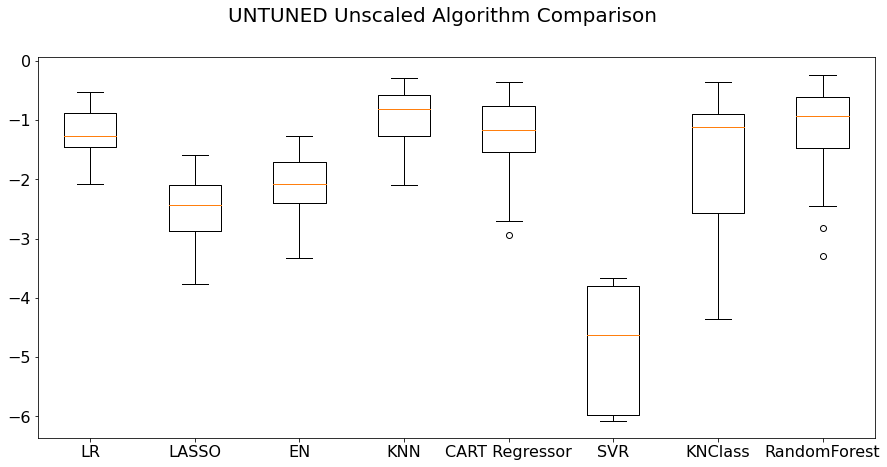

In [123]:
 # Compare Algorithms
fig = plt.figure()
fig.suptitle('UNTUNED Unscaled Algorithm Comparison',fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.gcf().set_size_inches(15, 7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Oversampling, explained
Random Forest often pairs well with oversampling techniques, such as SMOTE (Synthetic Minority Over-sampling Technique). What SMOTE will do is to magnify certain classes that are sparsely represented in the training dataset. This magnification will allow the training process to resolve these under-represented classes more effectively, because it will have seen more examples than were initially presented. For example, tableware has only seven examples in the training dataset. By applying SMOTE to the training dataset, this number is magnified to 61. In fact, all of the glass types are 'leveled' to 61 examples after SMOTE is applied. This leveling will make it much easier for the Random Forest Classifier to classify unseen examples to a greater level of accuracy.

At the end of this snippet, we see a comparison of counts for each of the glass types before and after the application of SMOTE. This is only a test to see what the counts would be. Later on, we will apply SMOTE to the definition of our model.

In [124]:
print()
print()
counter=Counter(Y_train)
print('Before SMOTE:',counter)

oversample = SMOTE(random_state=42,k_neighbors=5)
X_trainsm, Y_trainsm = oversample.fit_resample(X_train, Y_train)
counter=Counter(Y_trainsm)
print('After SMOTE:',counter)



Before SMOTE: Counter({2.0: 61, 1.0: 56, 7.0: 23, 3.0: 14, 5.0: 10, 6.0: 7})
After SMOTE: Counter({1.0: 61, 7.0: 61, 3.0: 61, 2.0: 61, 6.0: 61, 5.0: 61})


### Build data pipelines that can be used to input the training data.
Now that we have seen what the counts would be for an oversampled training dataset, we can create a data pipeline that combines SMOTE with our previously selected model, Random Forest Classifier. To test the efficacy of SMOTE, we should create two models. The first model we create will have the ability to apply a Random Forest Classifier to a non-oversampled dataset. The second will have the ability to apply Random Forest Classifier to an oversampled dataset. We will also want to add in a standard scaler to both model pipelines. The standard scaler takes features of different scale and makes them more similar in scale. This technique is very useful in further enhancing the model's ability to classify.  Note that even after we have defined our model pipelines, we have not yet supplied any data to them.

In [125]:
modelnoSMOTE=make_pipeline(
StandardScaler(),RandomForestClassifier(
n_estimators=100,max_features=9,class_weight='balanced'))

# Testing other models to be sure Random Forest really
# is best

#modelnoSMOTE=make_pipeline(
#StandardScaler(),KNeighborsClassifier(
#n_neighbors=5))

#modelnoSMOTE=make_pipeline(
    #StandardScaler(), KNeighborsRegressor(n_neighbors=5))

#modelnoSMOTE=make_pipeline(StandardScaler(), DecisionTreeRegressor())

modelwithSMOTE=make_pipeline(
StandardScaler(),SMOTE(
random_state=42, k_neighbors=5),RandomForestClassifier(
n_estimators=100,max_features=9,class_weight='balanced'))

### Fit the non-SMOTE model to the training data to train the model.
First, we will use and evaluate the non-SMOTE model. We will apply the non-SMOTE model to actual data by supplying it with our training data. The fit method applies the model by using the training features and targets to learn how to generalize to unseen validation data. 

In [126]:
modelnoSMOTE.fit(X_train, Y_train);

### Apply the trained non-SMOTE model to unseen data.
Now we can test the model's performance by applying it to unseen data (X_validation) and generating a report on the accuracy of its performance.

The variable called predictions takes our validation features and attempts to classify what type of glass the features for each example represents. Recall that we added in the two jars to our validation dataset, and so these predictions will include them.

In [127]:
predictions = modelnoSMOTE.predict(X_validation)

### How to Read a Confusion Matrix
The confusion matrix need not be confusing. It provides all the predictions in a matrix. Think of the columns and rows of the matrix as having been labeled with the names of the integer glass types, ordered left to right and top to bottom, in sequence. Row labels represent the true values, and column labels represent the predicted values. The intersection of true and predicted represents the status of any given cell in the matrix. Using this matrix, we can tell how many predictions were correct, how many were over-predicted, and how many were under-predicted. The diagonal line that can be drawn from the top left of the matrix to the bottom right, slicing the matrix into two equal diagonal halves, represents correct predictions (true=predicted). Each number in the same row as a correct prediction represents an under-prediction. In other words, the model under-predicts when the number of correct predictions for a category is less than the actual number in that category. By summing all of the numerals in any given row, we obtain the true number of glass types for each type. Each number in the same column as a correct prediction represents an over-prediction. In other words, the model over-predicts when the number of total predictions for a category in a given column is more than the correct predictions in that category. 

In [128]:
print('Random Forest without SMOTE oversampling')
print(confusion_matrix(Y_validation, predictions))

Random Forest without SMOTE oversampling
[[13  1  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 1  0  0  3  0  1]
 [ 0  1  0  0  1  0]
 [ 2  0  0  1  0  3]]


### Cohen's Kappa
The Cohen's Kappa statistic is a measure of inter-rater reliability. The "raters," in this machine learning example, are the actual glass types and the predictions of those types. In addition to considering the extent of agreement between these two, it also includes statistical consideration of the probability that this agreement could have occurred by chance.

The kappa score for the non-SMOTE Random Forest model is considered reasonably good.

In [129]:
kappa=cohen_kappa_score(Y_validation, np.round(predictions,0))
print('Kappa (1=perfect;0=chance;<0=worse than chance): %f' % kappa)

Kappa (1=perfect;0=chance;<0=worse than chance): 0.635381


### Mean absolute deviation
The mean absolute deviation, or MAD, is a measure of the average distance between each data value and the average value of the dataset. In terms of the confusion matrix above, it provides a sense of how far the values are distributed away from the central diagonal line.

In [130]:
MAD = mean_absolute_error(Y_validation, predictions)
print('MAD (Mean Absolute Dev): %f' % MAD)

MAD (Mean Absolute Dev): 0.755556


### The classification report
The classification report calculates precision and recall. Precision is the number of correct guesses in a class divided by the total guesses in a class. It can be obtained by observing the columns in the confusion matrix. Recall is the number of correct guesses in a class divided by the total number of actual members of the class. It can be obtained by observing the rows in the confusion matrix. The f1-score is the harmonic mean of precision and recall and is a good overall indicator of model effectiveness. Support is the true count for each type.

In [131]:
print(classification_report(Y_validation, predictions, zero_division=1))

              precision    recall  f1-score   support

         1.0       0.65      0.93      0.76        14
         2.0       0.86      0.80      0.83        15
         3.0       1.00      0.33      0.50         3
         5.0       0.60      0.60      0.60         5
         6.0       1.00      0.50      0.67         2
         7.0       0.75      0.50      0.60         6

    accuracy                           0.73        45
   macro avg       0.81      0.61      0.66        45
weighted avg       0.77      0.73      0.72        45



### Observe the predictions for the 1930s jars.
Since we already added the clear facsimile and the artifact to the validation dataset, the model has already made its predictions for these two samples. However, the evaluation thus far has not directly revealed what those predictions actually were. Now we will want to observe for ourselves how the model behaves toward these particular instances of the data. To do this, we can simply enter the array for each sample that we created above into the predict method of the noSMOTE model. We may obtain the underlying probabilities for these predictions by using the predict_proba method of the noSMOTE model.

In [132]:
yhat = modelnoSMOTE.predict([artifact_features])
print('artifact prediction:',dict[int(yhat)])
yhat2 = modelnoSMOTE.predict([facsimile_features])
print('clear facsimile prediction:',dict[int(yhat2)])
yhat_probability = modelnoSMOTE.predict_proba([artifact_features])
yhat2_probability = modelnoSMOTE.predict_proba([facsimile_features])

artifact prediction: WindowF
clear facsimile prediction: Headlamp


### Display the details of the jar prediction probabilities for the non-SMOTE model.
Now we have the opportunity to use the utility display function we created above. Nesting calls to this function inside another function will allow the report to be generated with a single call when we next run a report for the SMOTE version of our model. We can also here include extra niceties such as colored text to highlight probabilities for the Container class and check marks to indicate where the prediction was correct.

In [133]:
def the_report():
    if dict[yhat[0]]=='Container':
        print('artifact prediction:',Fore.RED + dict[yhat[0]]+' ' + u'\u2713')
    else:
        print('artifact prediction:',Fore.BLACK + dict[yhat[0]])
    make_nicer_probability_output(yhat_probability,'artifact')
    print()
    if dict[yhat2[0]]=='Container':
        print('clear facsimile prediction:',Fore.RED + dict[yhat2[0]]+' ' + u'\u2713')
    else:
        print('clear facsimile prediction:',Fore.BLACK + dict[yhat2[0]])
    make_nicer_probability_output(yhat2_probability,'clear facsimile')
    return

the_report()

artifact prediction: WindowF
The artifact has a probability of:
40% to be a WindowF
33% to be a WindowNF
19% to be a Headlamp
8% to be a VehicleF
0% to be a Container
0% to be a Tableware

clear facsimile prediction: Headlamp
The clear facsimile has a probability of:
40% to be a Headlamp
20% to be a Container
18% to be a WindowNF
14% to be a WindowF
7% to be a Tableware
1% to be a VehicleF


### Run the report again for the SMOTE model.
Having proceeded through a step-by-step analysis of the machine learning classification report we have built, we can now run the same report again, this time using the second SMOTE model we created. This model will, again: 
1. oversample the data with SMOTE
2. scale the data with StandardScaler 
3. classify each glass example with RandomForestClassifier and
4. output the numerical prediction and probabilities of glass type for the artifact and for the clear facsimile

In [134]:
modelwithSMOTE.fit(X_train, Y_train)

print()
print('Random Forest with SMOTE oversampling')
predictions = modelwithSMOTE.predict(X_validation)
ytrue=5
predictions=np.round(predictions, 0)

print(confusion_matrix(Y_validation, predictions))
kappa=cohen_kappa_score(Y_validation, np.round(predictions,0))
MAD = mean_absolute_error(Y_validation, predictions)
print('Kappa (1=perfect;0=chance;<0=worse than chance): %f' % kappa)
print('MAD (Mean Absolute Dev): %f' % MAD)
print(classification_report(Y_validation, predictions, zero_division=1))
yhat = modelwithSMOTE.predict([artifact_features])
print('artifact prediction:',dict[int(yhat)])
yhat2 = modelwithSMOTE.predict([facsimile_features])
print('clear facsimile prediction:',dict[int(yhat2)])
yhat_probability = modelwithSMOTE.predict_proba([artifact_features])
yhat2_probability = modelwithSMOTE.predict_proba([facsimile_features])   


Random Forest with SMOTE oversampling
[[13  1  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 2  0  0  1  0  3]]
Kappa (1=perfect;0=chance;<0=worse than chance): 0.730897
MAD (Mean Absolute Dev): 0.555556
              precision    recall  f1-score   support

         1.0       0.72      0.93      0.81        14
         2.0       0.86      0.80      0.83        15
         3.0       1.00      0.67      0.80         3
         5.0       0.67      0.80      0.73         5
         6.0       1.00      1.00      1.00         2
         7.0       1.00      0.50      0.67         6

    accuracy                           0.80        45
   macro avg       0.87      0.78      0.81        45
weighted avg       0.83      0.80      0.80        45

artifact prediction: WindowNF
clear facsimile prediction: Container


### Display the detail of jar prediction probabilities for the SMOTE model.
Our final coding step will be to re-run the report of probabilities using our SMOTE-enhanced Random Forest Classifier model.

In [135]:
the_report()

artifact prediction: WindowNF
The artifact has a probability of:
48% to be a WindowNF
28% to be a WindowF
12% to be a VehicleF
9% to be a Container
3% to be a Headlamp
0% to be a Tableware

clear facsimile prediction: Container ✓
The clear facsimile has a probability of:
46% to be a Container
25% to be a WindowNF
13% to be a WindowF
13% to be a Headlamp
2% to be a VehicleF
1% to be a Tableware


## Analysis Procedure
Let us review the machine learning process that we have just created and executed. The following sequence of operations was performed:<br>
1) Create two arrays. The first contains the database features, all of the predictive columns of the original dataset. The second contains the target column, GlassType.<br>
2) Create a train-test, stratified split so that the model can be trained on 80% of the data and validated on a subsample of 20%.<br>
3) Add the two external glass sample jars to the validation (unseen) data, both for features (X) and for target (Y).<br>
4) Test a set of regression and classification models on the training dataset and report the MSE (mean squared error) results for each one, as well as the standard deviation of the MSE.<br>
5) Plot the preliminary effectiveness of each model on a box plot.<br>
6) Select the model most likely to succeed. In this case, Random Forest Classifier was selected.<br> 
7) Build two models of Random Forest Classifier, one without oversampling and the other with oversampling. Use the standard scaler in both models to make the scale of the features more uniform with one another.<br> 
8) Fit the models to the dataset.<br>
9) Print a report on the performance of the models.<br>
10) For each model, print a report on the predicted result for both of the two unseen jars and the probability of the prediction for each glass type.<br>

## Findings
One of the most interesting findings was that when the SMOTE oversampling algorithm was used with the Random Forest Classifier, the resolving power of the model increased to the point that it was consistently able to identify the clear facsimile jar correctly as a container. Without the SMOTE oversampling algorithm applied, the model predicted the clear facsimile jar to be a headlamp. The prediction of container scored a distant third or fourth place.

The non-SMOTE model predicted the 1930s artifact jar to be a window, usually of the float variety*. This is very close to the prediction made by the model when SMOTE was used. Following application of SMOTE oversampling, the model predicted the artifact jar to be a non-float window.

These machine learning model predictions would seem to indicate that the clear facsimile jar can be correctly identified through prudent enhancement of the model with oversampling techniques. These techniques, however, are ineffective in increasing the ability of the model to predict the 1930s artifact jar to be what it is, a container.

Using a well-tuned model, the fact that a non-float window, of a type often typically seen in churches, was predicted for the 1930s artifact jar demonstrates that this database of late 20th century glassware lacks enough relevant case examples that would allow it to predict this artifact correctly.

## Conclusions
But could these case examples be found? Our machine learning model can correctly characterize the clear facsimile, a jar of the same size and shape as the artifact, and possibly from the same era. The model cannot correctly characterize the semi-opaque 1930s artifact jar. One might suppose that the 1930s artifact jar has a rare and original recipe that, in the absence of any information other than the data nourishing the model, is not readily identifiable as to the glass type, even with the powerful machine learning tools, such as random forests, available to us in 2022. While this may not be confirmative as to whether or not the jar was owned and brought to Nikumaroro Island by Amelia Earhart, this fact is further confirmation of the artifact jar's originality, perhaps even in its own time.

\* Because the model is stochastic in nature, results will not be exactly the same each time.

[1] <i>Caddy, Brian, ed.  Forensic Examination of Glass and Paint.  London: Taylor & Francis, 2001, p. 61.</i><br>
[2] <i>Kaur, Gurbinder. Bioactive Glasses: Potential Biomaterials for Future Therapy. Germany: Springer International Publishing, 2017, p. 107.</i>
    
Acknowledgements:<br>
I owe much of what I have learned to date in machine learning to Dr. Jason Brownlee:
https://machinelearningmastery.com/machine-learning-with-python/